# 광진구 상권 밀집도 분석

In [13]:
import pandas as pd
import seaborn as sns
import pyproj
import numpy as np

In [14]:
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [15]:
# 폰트가 선명하게 보일 수 있도록 레티나를 설정해준다.
%config InlineBackend.figure_format = 'retina'

In [16]:
df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202303.csv",low_memory=False)
df.tail(3)

상가업소번호    상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
474257  MA0101202302A0036033    루젤라  NaN        I2       음식      I204   
474258  MA0101202302A0049679  153커피  NaN        S2    수리·개인      S205   
474259  MA0101202302A0109595   송죽상회  NaN        G2       소매      G205   

       상권업종중분류명 상권업종소분류코드    상권업종소분류명 표준산업분류코드  ...  \
474257      서양식    I20401         경양식   I56123  ...   
474258  가전제품 수리    S20501    가전제품 수리업   S95310  ...   
474259   식료품 소매    G20504  건어물/젓갈 소매업   G47213  ...   

                           건물관리번호     건물명                   도로명주소   구우편번호  \
474257  1168010800102110021000002  펜트힐루논현       서울특별시 강남구 언주로 641  135996   
474258  1156012800102380003019433     NaN  서울특별시 영등포구 양평로20길 14-2  150867   
474259  1114015100100760001012670     NaN      서울특별시 중구 을지로 230-1  100195   

       신우편번호  동정보  층정보  호정보          경도         위도  
474257  6105  NaN    1  NaN  127.034849  37.513922  
474258  7206  NaN  NaN  NaN  126.896172  37.538297  
474259  4561  NaN    3  NaN  127.003676  37.566546  

[3 rows x 39 columns]

In [17]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [18]:
df["상권업종대분류명"].unique()

array(['음식', '숙박', '교육', '과학·기술', '소매', '시설관리·임대', '수리·개인', '부동산',
       '예술·스포츠', '보건의료'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474260 entries, 0 to 474259
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     474260 non-null  object 
 1   상호명        474260 non-null  object 
 2   지점명        1216 non-null    object 
 3   상권업종대분류코드  474260 non-null  object 
 4   상권업종대분류명   474260 non-null  object 
 5   상권업종중분류코드  474260 non-null  object 
 6   상권업종중분류명   474260 non-null  object 
 7   상권업종소분류코드  474260 non-null  object 
 8   상권업종소분류명   474260 non-null  object 
 9   표준산업분류코드   474260 non-null  object 
 10  표준산업분류명    474260 non-null  object 
 11  시도코드       474260 non-null  int64  
 12  시도명        474260 non-null  object 
 13  시군구코드      474260 non-null  int64  
 14  시군구명       474260 non-null  object 
 15  행정동코드      474260 non-null  int64  
 16  행정동명       474260 non-null  object 
 17  법정동코드      474260 non-null  int64  
 18  법정동명       474260 non-null  object 
 19  지번코드       474260 non-n

In [20]:
# 광진구 상권정보만 추출
df_kj = df[df["시군구명"] == "광진구"]
df_kj

상가업소번호          상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       MA0101202210A0037544       영자's곱창  NaN        I2       음식      I201   
19      MA010120220805431191       맑은에스테틱  NaN        S2    수리·개인      S208   
71      MA010120220805433802         썬더치킨  NaN        I2       음식      I210   
99      MA010120220805433025          메호르  NaN        I2       음식      I204   
106     MA010120220805433097           더봄  NaN        S2    수리·개인      S207   
...                      ...          ...  ...       ...      ...       ...   
474178  MA0101202302A0043855   세븐일레븐중곡타운점  NaN        G2       소매      G204   
474190  MA0101202302A0052467     크림슨영어교습소  NaN        P1       교육      P105   
474199  MA0101202302A0042259  한국가전청소평생교육원  NaN        P1       교육      P106   
474244  MA0101202302A0061755      하트노래연습장  NaN        R1   예술·스포츠      R104   
474256  MA0101202302A0001316    좋은소식법률사무소  NaN        M1    과학·기술      M103   

       상권업종중분류명 상권업종소분류코드       상권업종소분류명 표준산업분류코드  ...  \
0            한식    I20109       곱창 전골/구이   I56111  ...   
19      욕탕·신체관리    S20802         마사지/안마   S96122  ...   
71        기타 간이    I21006             치킨   I56193  ...   
99          서양식    I20401            경양식   I56123  ...   
106       이용·미용    S20703            네일숍   S96119  ...   
...         ...       ...            ...      ...  ...   
474178    종합 소매    G20405            편의점   G46103  ...   
474190    일반 교육    P10501        입시·교과학원   P85501  ...   
474199    기타 교육    P10625  기타 기술/직업 훈련학원   P85669  ...   
474244   유원지·오락    R10407            노래방   R91223  ...   
474256    법무관련     M10301            변호사   M71101  ...   

                           건물관리번호  건물명                 도로명주소   구우편번호 신우편번호  \
0       1121510100101690021003140  NaN     서울특별시 광진구 면목로 172  143900  4904   
19      1121510500100480053015378  NaN   서울특별시 광진구 뚝섬로32길 33  143843  5085   
71      1121510900101490006018973  NaN     서울특별시 광진구 군자로 127  143839  4999   
99      1121510700100110001016692  NaN   서울특별시 광진구 능동로13길 15  143914  5016   
106     1121510900100480036000001  NaN       서울특별시 광진구 면목로 7  143837  4999   
...                           ...  ...                   ...     ...   ...   
474178  1121510100101380010002453   한성  서울특별시 광진구 용마산로3길 104  143891  4926   
474190  1121510300100700028007661  NaN     서울특별시 광진구 자양로 246  143819  4975   
474199  1121510100100210009000100  NaN    서울특별시 광진구 용마산로 106  143883  4941   
474244  1121510300102570097009784  NaN  서울특별시 광진구 아차산로51길 50  143828  5043   
474256  1121510700100200030025643  NaN   서울특별시 광진구 동일로30길 16  143916  5007   

        동정보 층정보  호정보          경도         위도  
0       NaN   1  NaN  127.082832  37.568503  
19      NaN   1  NaN  127.066814  37.534047  
71      NaN   1  NaN  127.073598  37.553662  
99      NaN   2  NaN  127.070892  37.542783  
106     NaN   1  NaN  127.075155  37.554936  
...     ...  ..  ...         ...        ...  
474178  NaN   1  NaN  127.082640  37.557445  
474190  NaN   3  NaN  127.089202  37.548332  
474199  NaN   3  NaN  127.087245  37.563113  
474244  NaN   지  NaN  127.085036  37.539209  
474256  NaN   1  NaN  127.068072  37.547501  

[16227 rows x 39 columns]

In [21]:
df_kj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16227 entries, 0 to 474256
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     16227 non-null  object 
 1   상호명        16227 non-null  object 
 2   지점명        47 non-null     object 
 3   상권업종대분류코드  16227 non-null  object 
 4   상권업종대분류명   16227 non-null  object 
 5   상권업종중분류코드  16227 non-null  object 
 6   상권업종중분류명   16227 non-null  object 
 7   상권업종소분류코드  16227 non-null  object 
 8   상권업종소분류명   16227 non-null  object 
 9   표준산업분류코드   16227 non-null  object 
 10  표준산업분류명    16227 non-null  object 
 11  시도코드       16227 non-null  int64  
 12  시도명        16227 non-null  object 
 13  시군구코드      16227 non-null  int64  
 14  시군구명       16227 non-null  object 
 15  행정동코드      16227 non-null  int64  
 16  행정동명       16227 non-null  object 
 17  법정동코드      16227 non-null  int64  
 18  법정동명       16227 non-null  object 
 19  지번코드       16227 non-null  int64  
 20  대지구분코

In [22]:
df_kj.shape

(16227, 39)

광진구 상권 정보 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

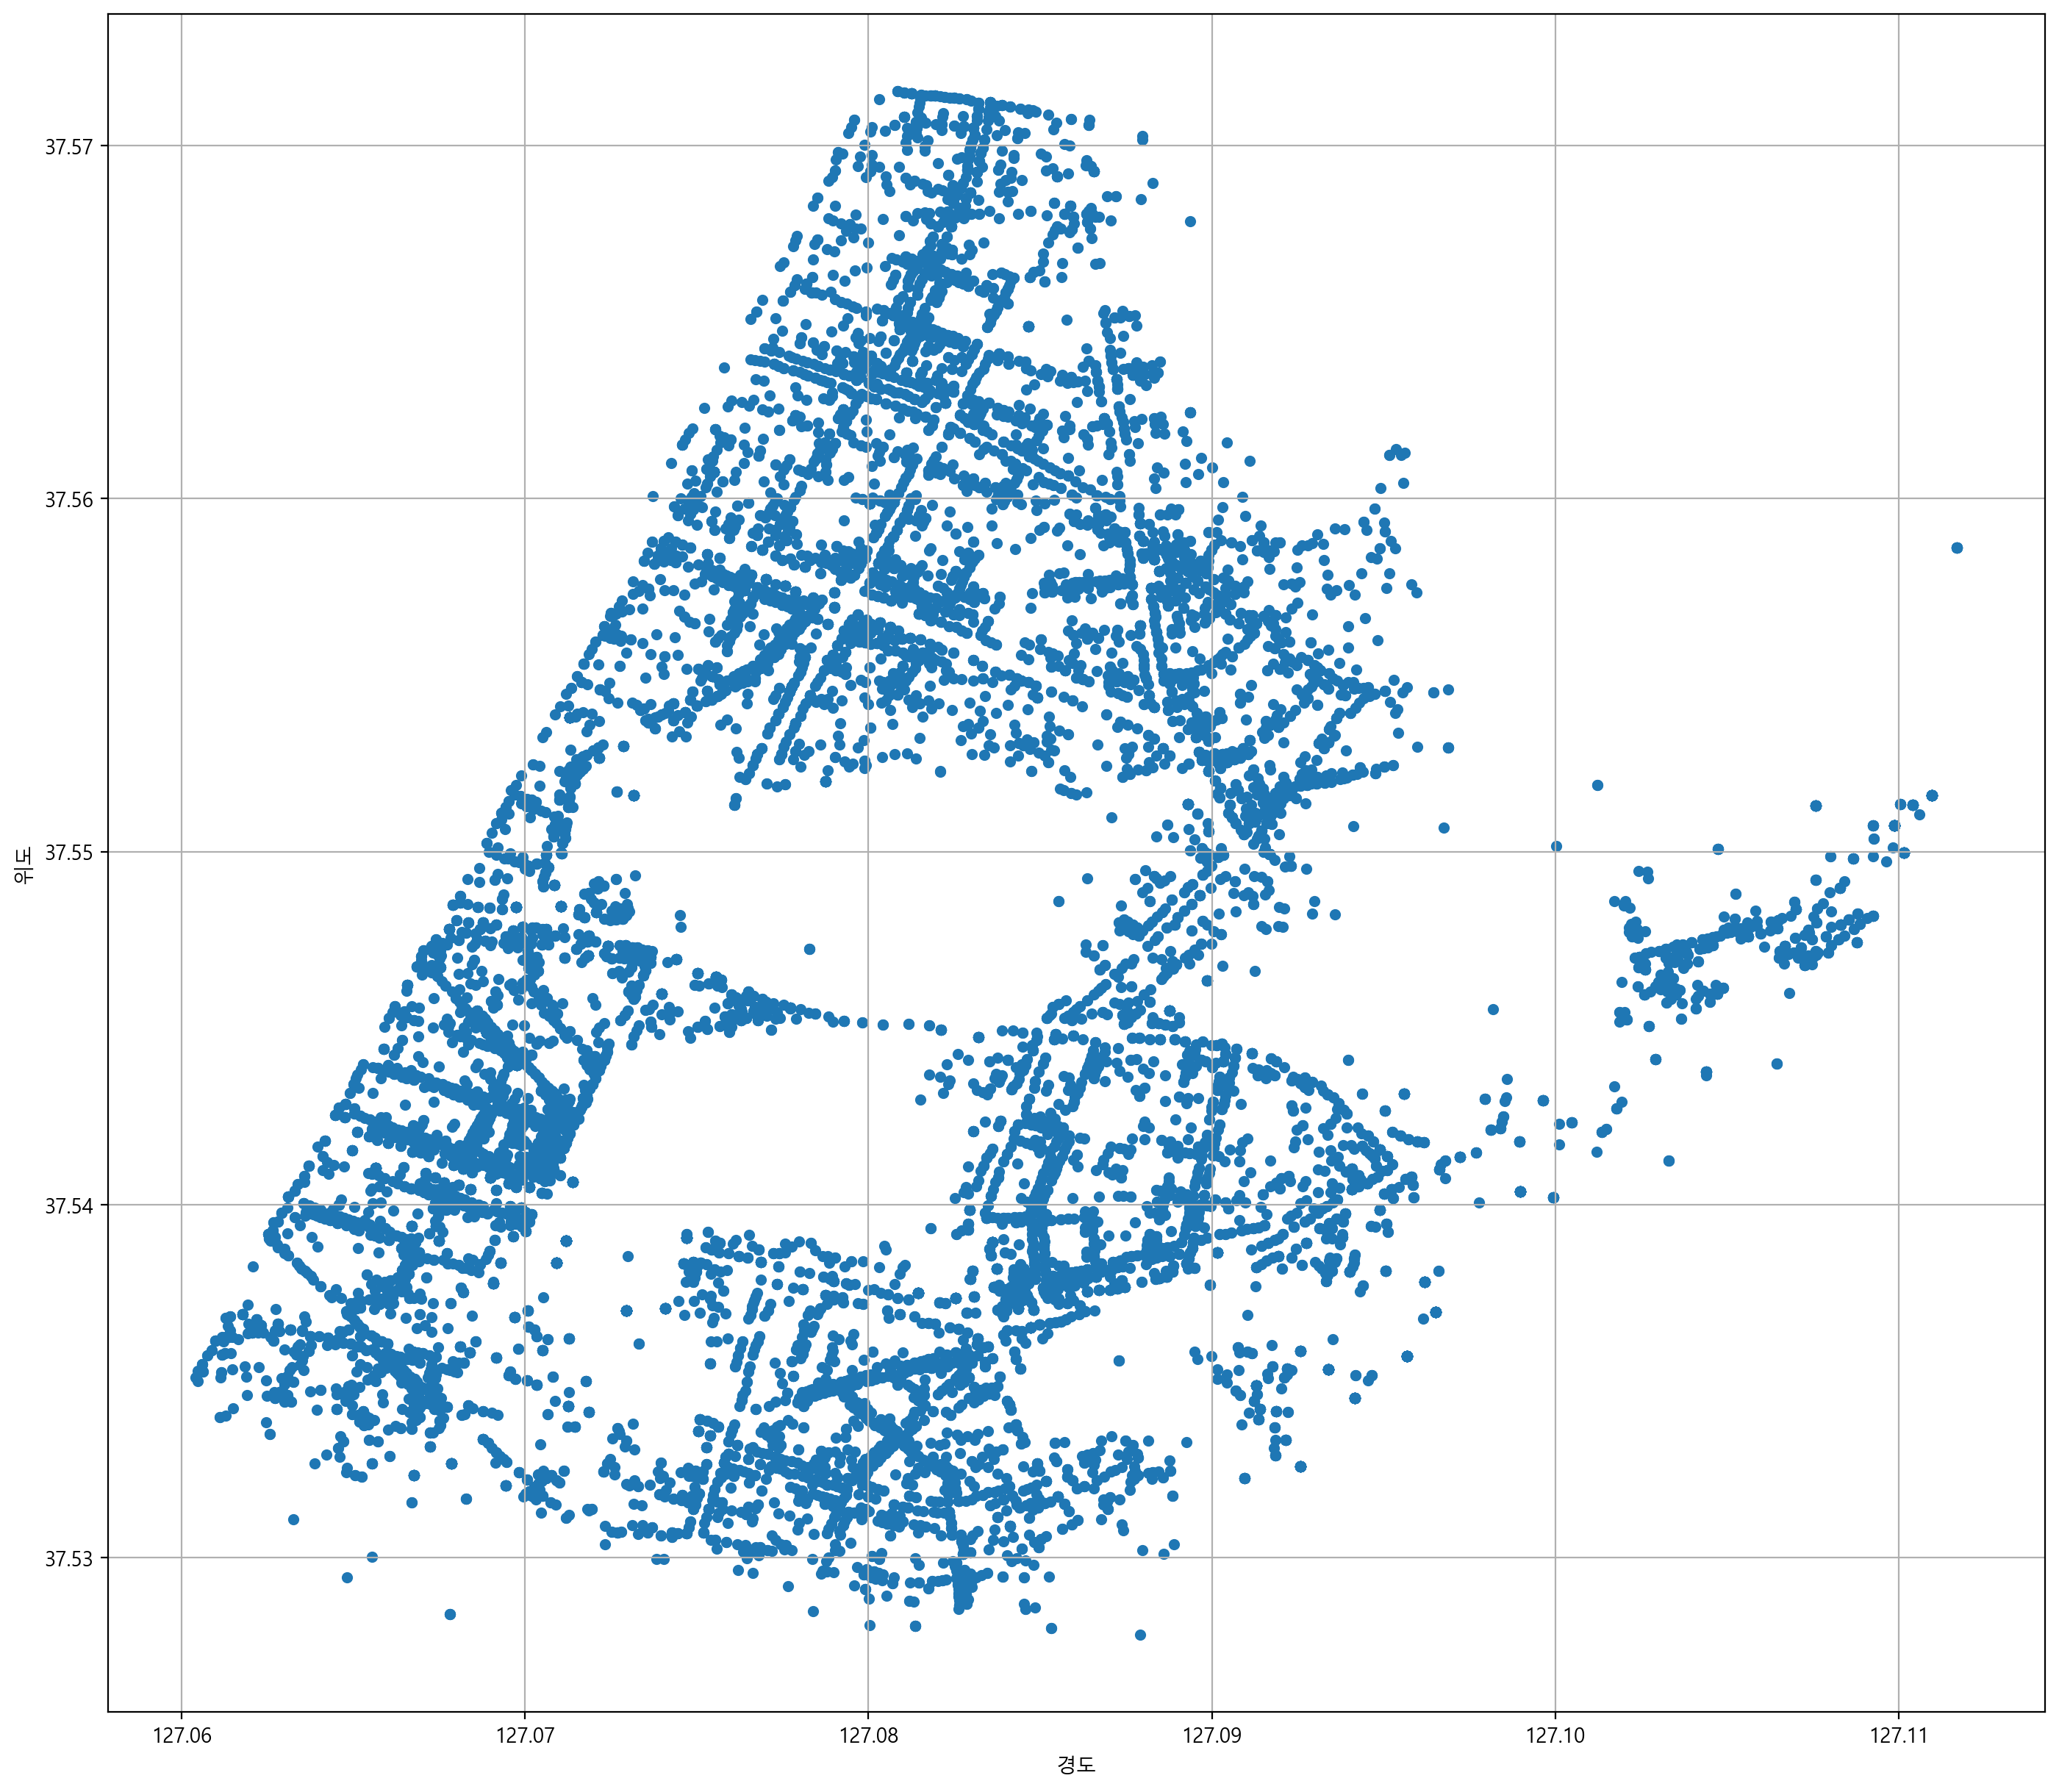

In [23]:
df_kj[["경도", "위도", "행정동명"]].plot.scatter(x="경도", y="위도", figsize = (17,15), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

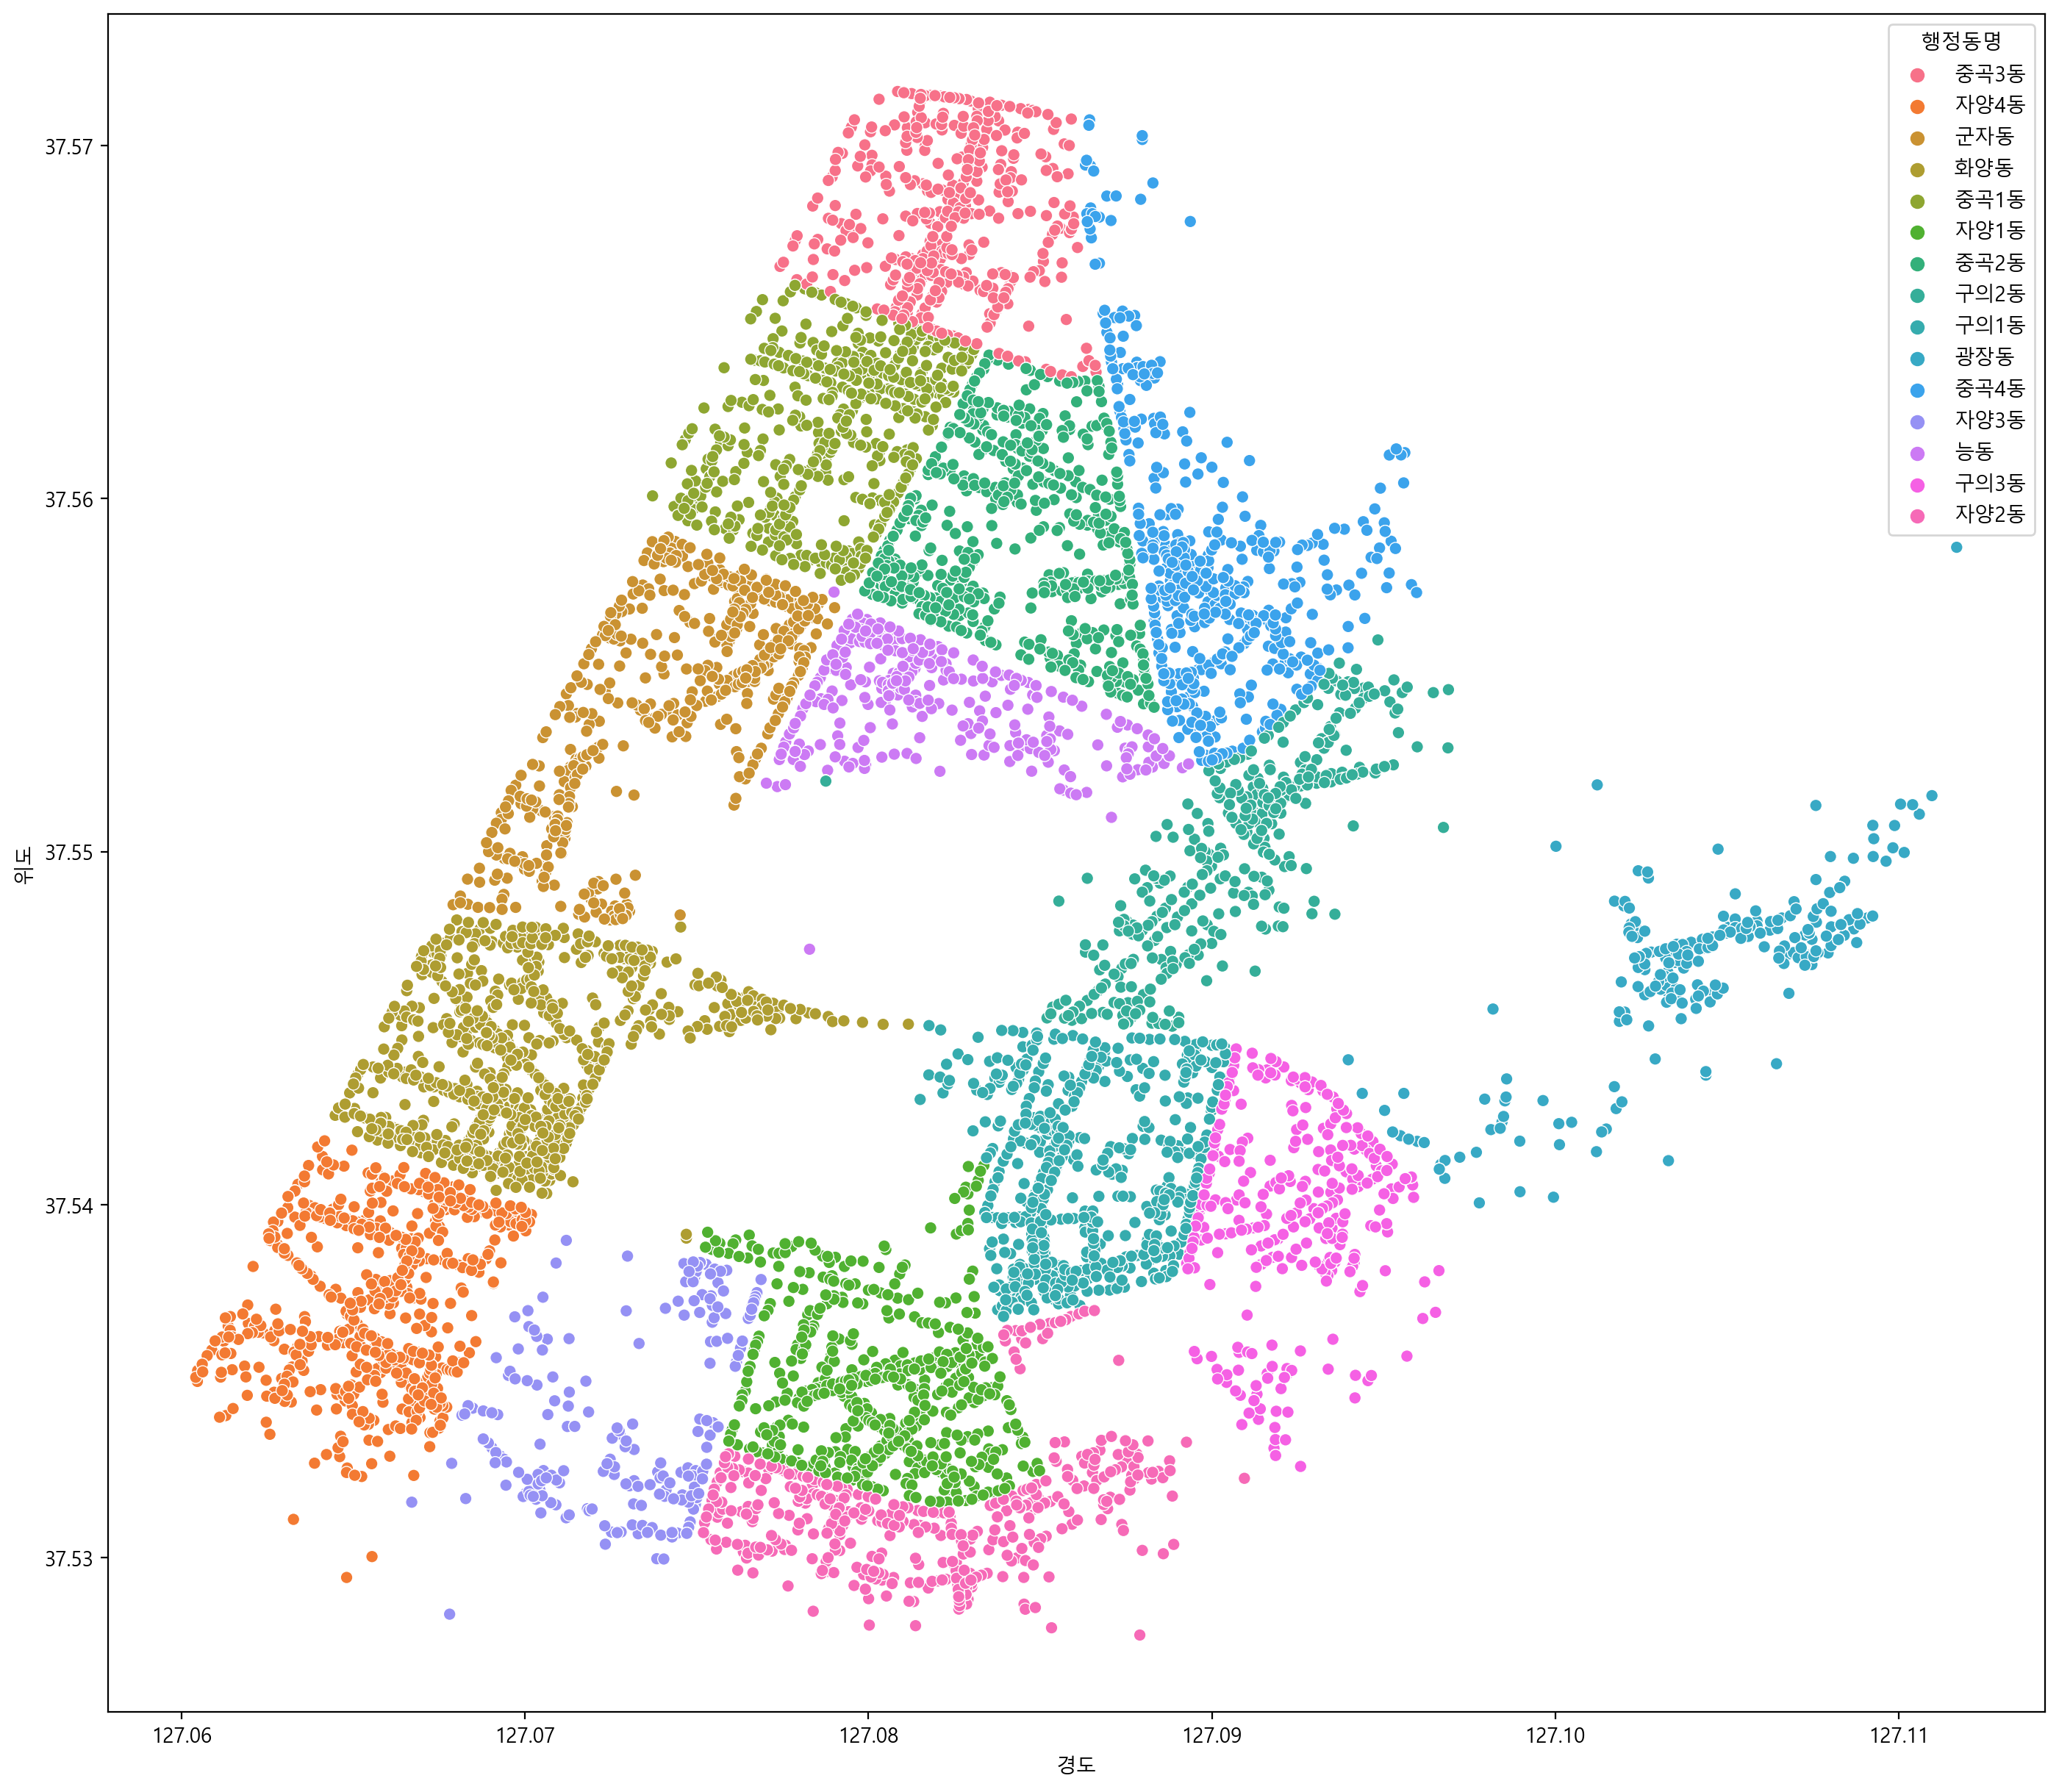

In [24]:
plt.figure(figsize = (17,15))
sns.scatterplot(data=df_kj, x="경도", y="위도", hue="행정동명")

## 광진구 실질상권 분석

In [25]:
# 광진구 실질상권 데이터 추출 real_df
real_df = df_kj[(df_kj["상권업종대분류명"] == "음식") | (df_kj["상권업종대분류명"] == "숙박") | 
                (df_kj["상권업종대분류명"] == "소매") | (df_kj["상권업종대분류명"] == "예술·스포츠") | 
                (df_kj["상권업종대분류명"] == "보건의료")]
real_df

상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       MA0101202210A0037544      영자's곱창  NaN        I2       음식      I201   
71      MA010120220805433802        썬더치킨  NaN        I2       음식      I210   
99      MA010120220805433025         메호르  NaN        I2       음식      I204   
236     MA010120220805437728         딘두오  NaN        G2       소매      G209   
275     MA010120220805437249         제이엔  NaN        G2       소매      G209   
...                      ...         ...  ...       ...      ...       ...   
474054  MA0101202302A0112231   구스치킨구's치킨  NaN        I2       음식      I210   
474067  MA0101202302A0045430         류앤유  NaN        I2       음식      I211   
474108  MA0101202302A0102284    라온게트스하우스  NaN        I1       숙박      I101   
474178  MA0101202302A0043855  세븐일레븐중곡타운점  NaN        G2       소매      G204   
474244  MA0101202302A0061755     하트노래연습장  NaN        R1   예술·스포츠      R104   

           상권업종중분류명 상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...  \
0                한식    I20109   곱창 전골/구이   I56111  ...   
71            기타 간이    I21006         치킨   I56193  ...   
99              서양식    I20401        경양식   I56123  ...   
236     섬유·의복·신발 소매    G20908     가발 소매업   G47422  ...   
275     섬유·의복·신발 소매    G20905  기타 의류 소매업   G47419  ...   
...             ...       ...        ...      ...  ...   
474054        기타 간이    I21006         치킨   I56193  ...   
474067           주점    I21103     생맥주 전문   I56213  ...   
474108        일반 숙박    I10103         펜션   I55104  ...   
474178        종합 소매    G20405        편의점   G46103  ...   
474244       유원지·오락    R10407        노래방   R91223  ...   

                           건물관리번호    건물명                 도로명주소   구우편번호 신우편번호  \
0       1121510100101690021003140    NaN     서울특별시 광진구 면목로 172  143900  4904   
71      1121510900101490006018973    NaN     서울특별시 광진구 군자로 127  143839  4999   
99      1121510700100110001016692    NaN   서울특별시 광진구 능동로13길 15  143914  5016   
236     1121510100106360013000002    NaN  서울특별시 광진구 천호대로103길 8  143912  4920   
275     1121510100101170001001985    NaN     서울특별시 광진구 용마산로 29  143890  4931   
...                           ...    ...                   ...     ...   ...   
474054  1121510700101130001017827  광진코지웰   서울특별시 광진구 능동로19길 35  143915  5009   
474067  1121510700100030030021440    NaN     서울특별시 광진구 능동로 135  143914  5011   
474108  1121510300102410065009126    NaN    서울특별시 광진구 구의로3길 19  143824  5041   
474178  1121510100101380010002453     한성  서울특별시 광진구 용마산로3길 104  143891  4926   
474244  1121510300102570097009784    NaN  서울특별시 광진구 아차산로51길 50  143828  5043   

        동정보  층정보  호정보          경도         위도  
0       NaN    1  NaN  127.082832  37.568503  
71      NaN    1  NaN  127.073598  37.553662  
99      NaN    2  NaN  127.070892  37.542783  
236     NaN  NaN  NaN  127.075429  37.559362  
275     NaN    1  NaN  127.087896  37.556180  
...     ...  ...  ...         ...        ...  
474054  NaN    1  NaN  127.071757  37.547007  
474067  NaN    1  NaN  127.071806  37.542998  
474108  NaN  NaN  NaN  127.087411  37.540245  
474178  NaN    1  NaN  127.082640  37.557445  
474244  NaN    지  NaN  127.085036  37.539209  

[10016 rows x 39 columns]

### 광진구 실질 상권 데이터 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

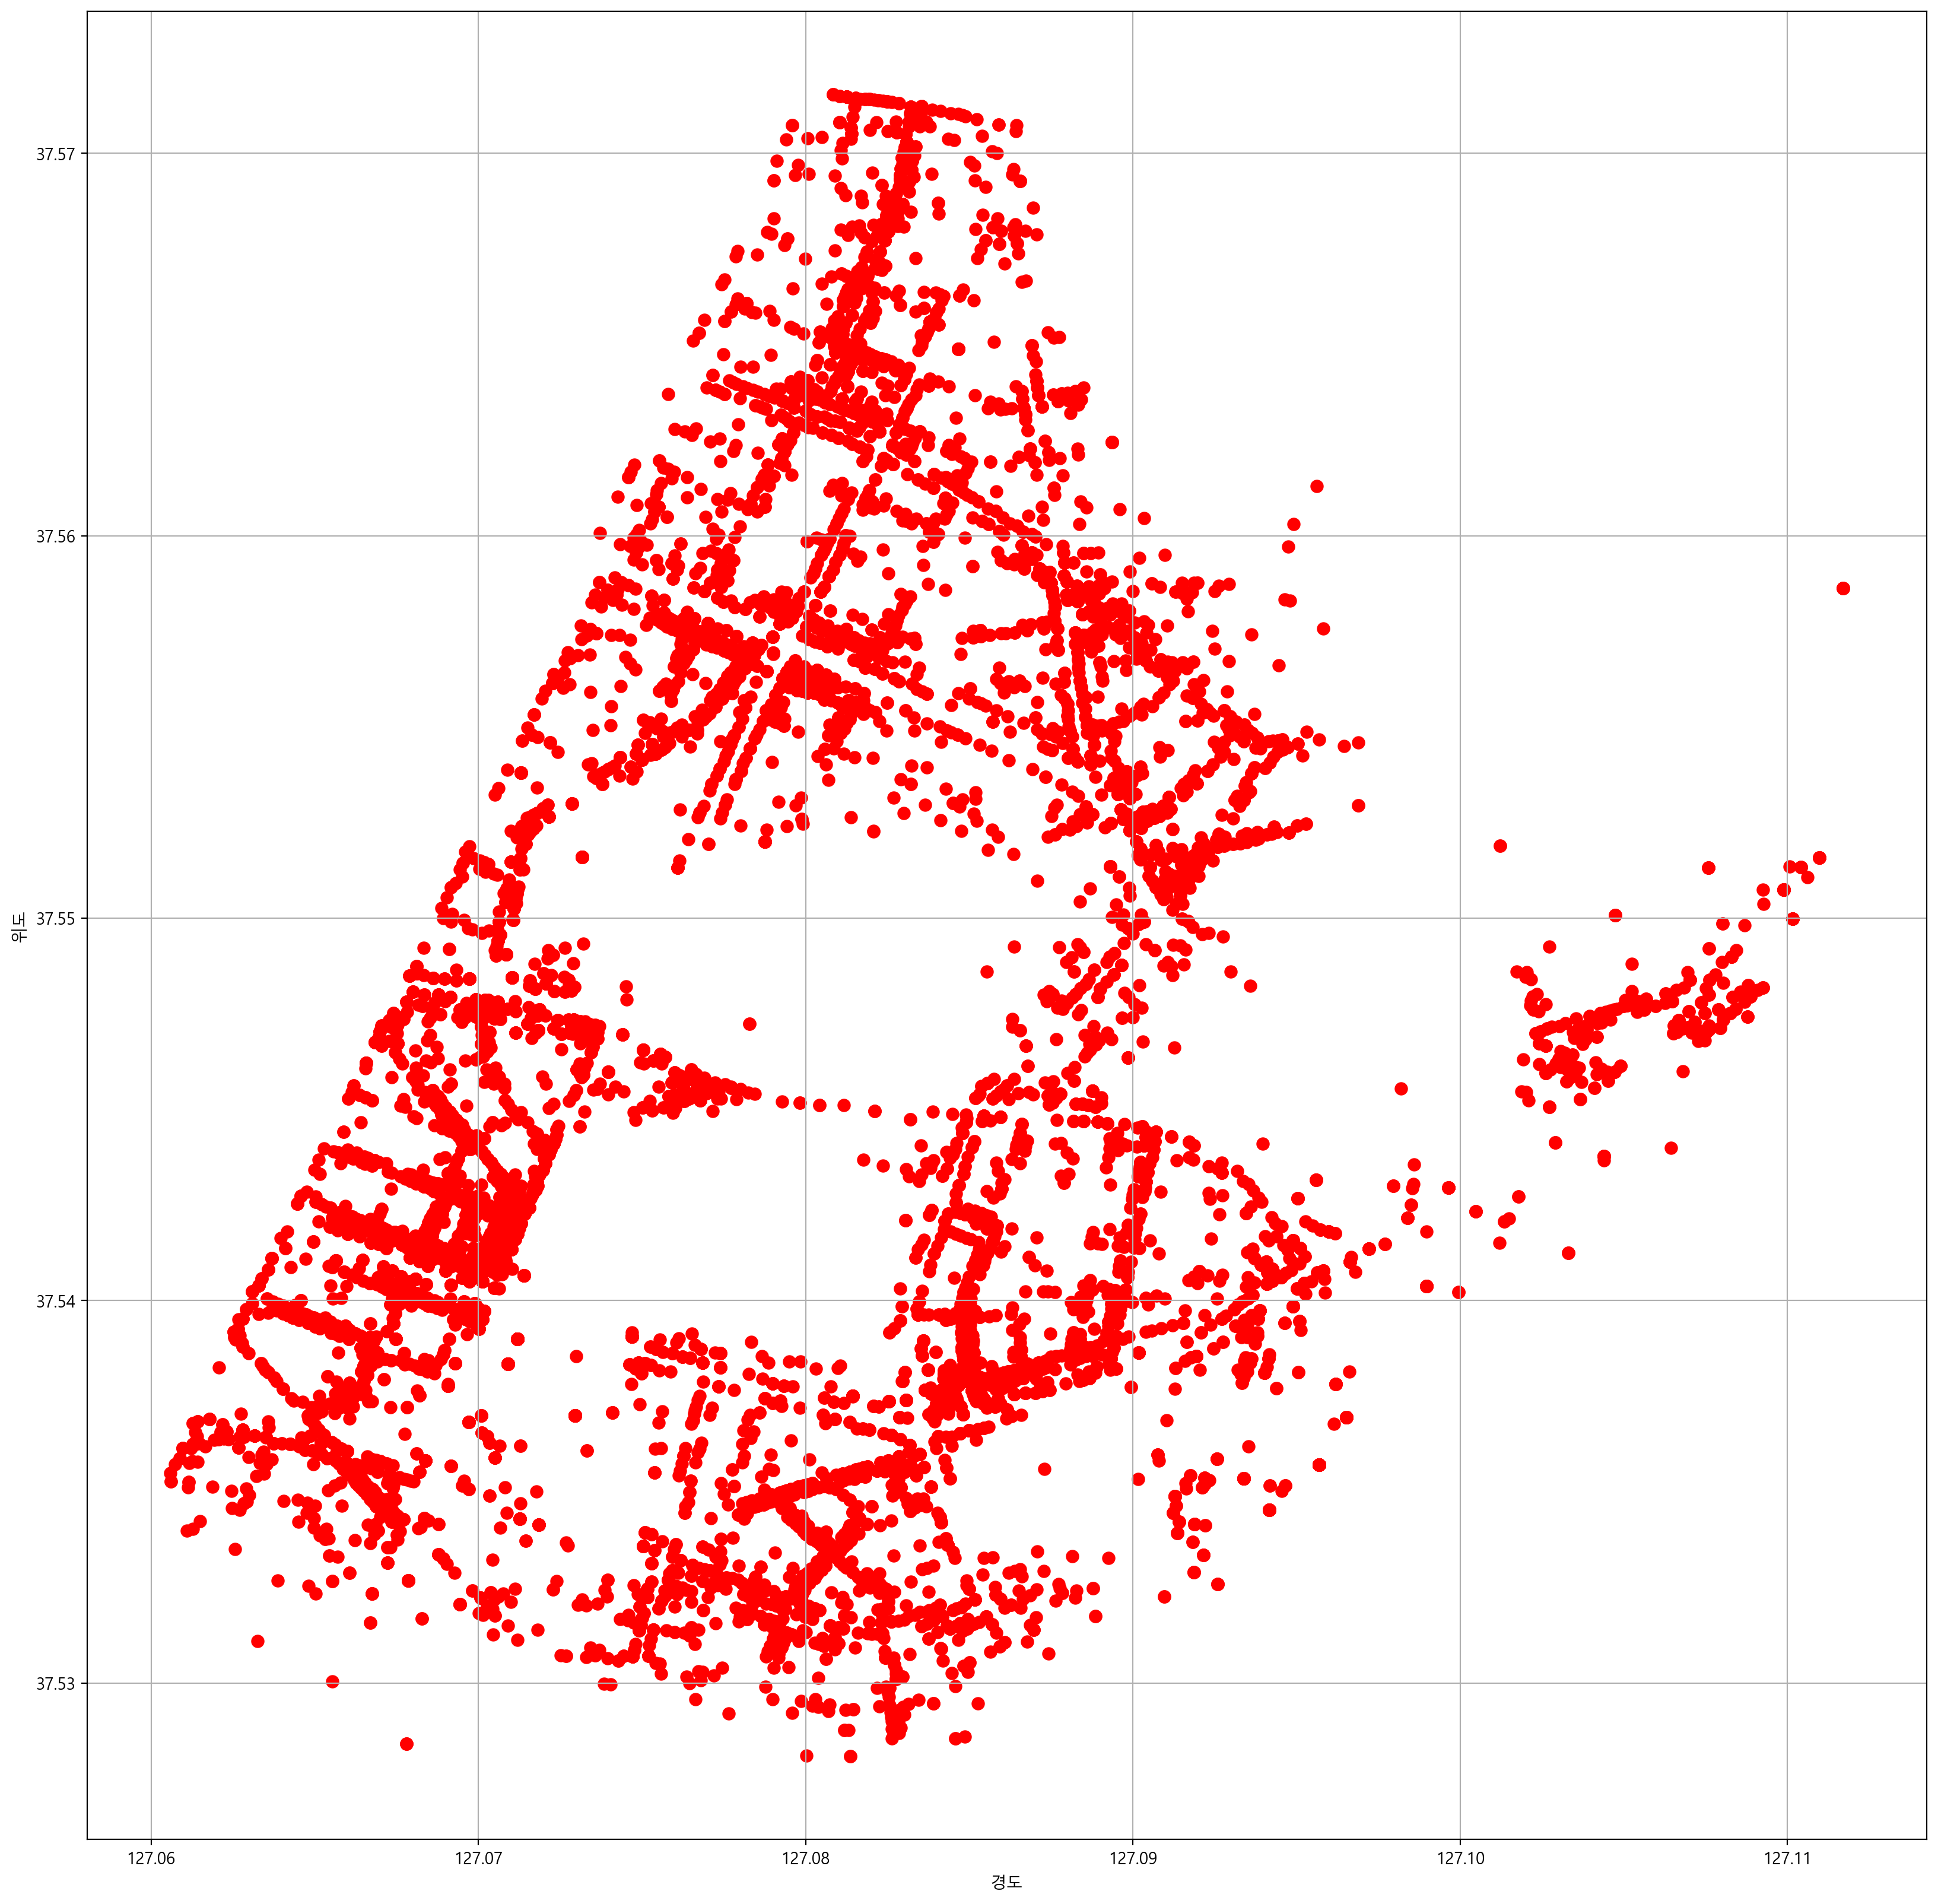

In [16]:
real_df[["경도", "위도"]].plot.scatter(x="경도", y="위도", figsize = (20,20), color = 'red', s = 50, grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

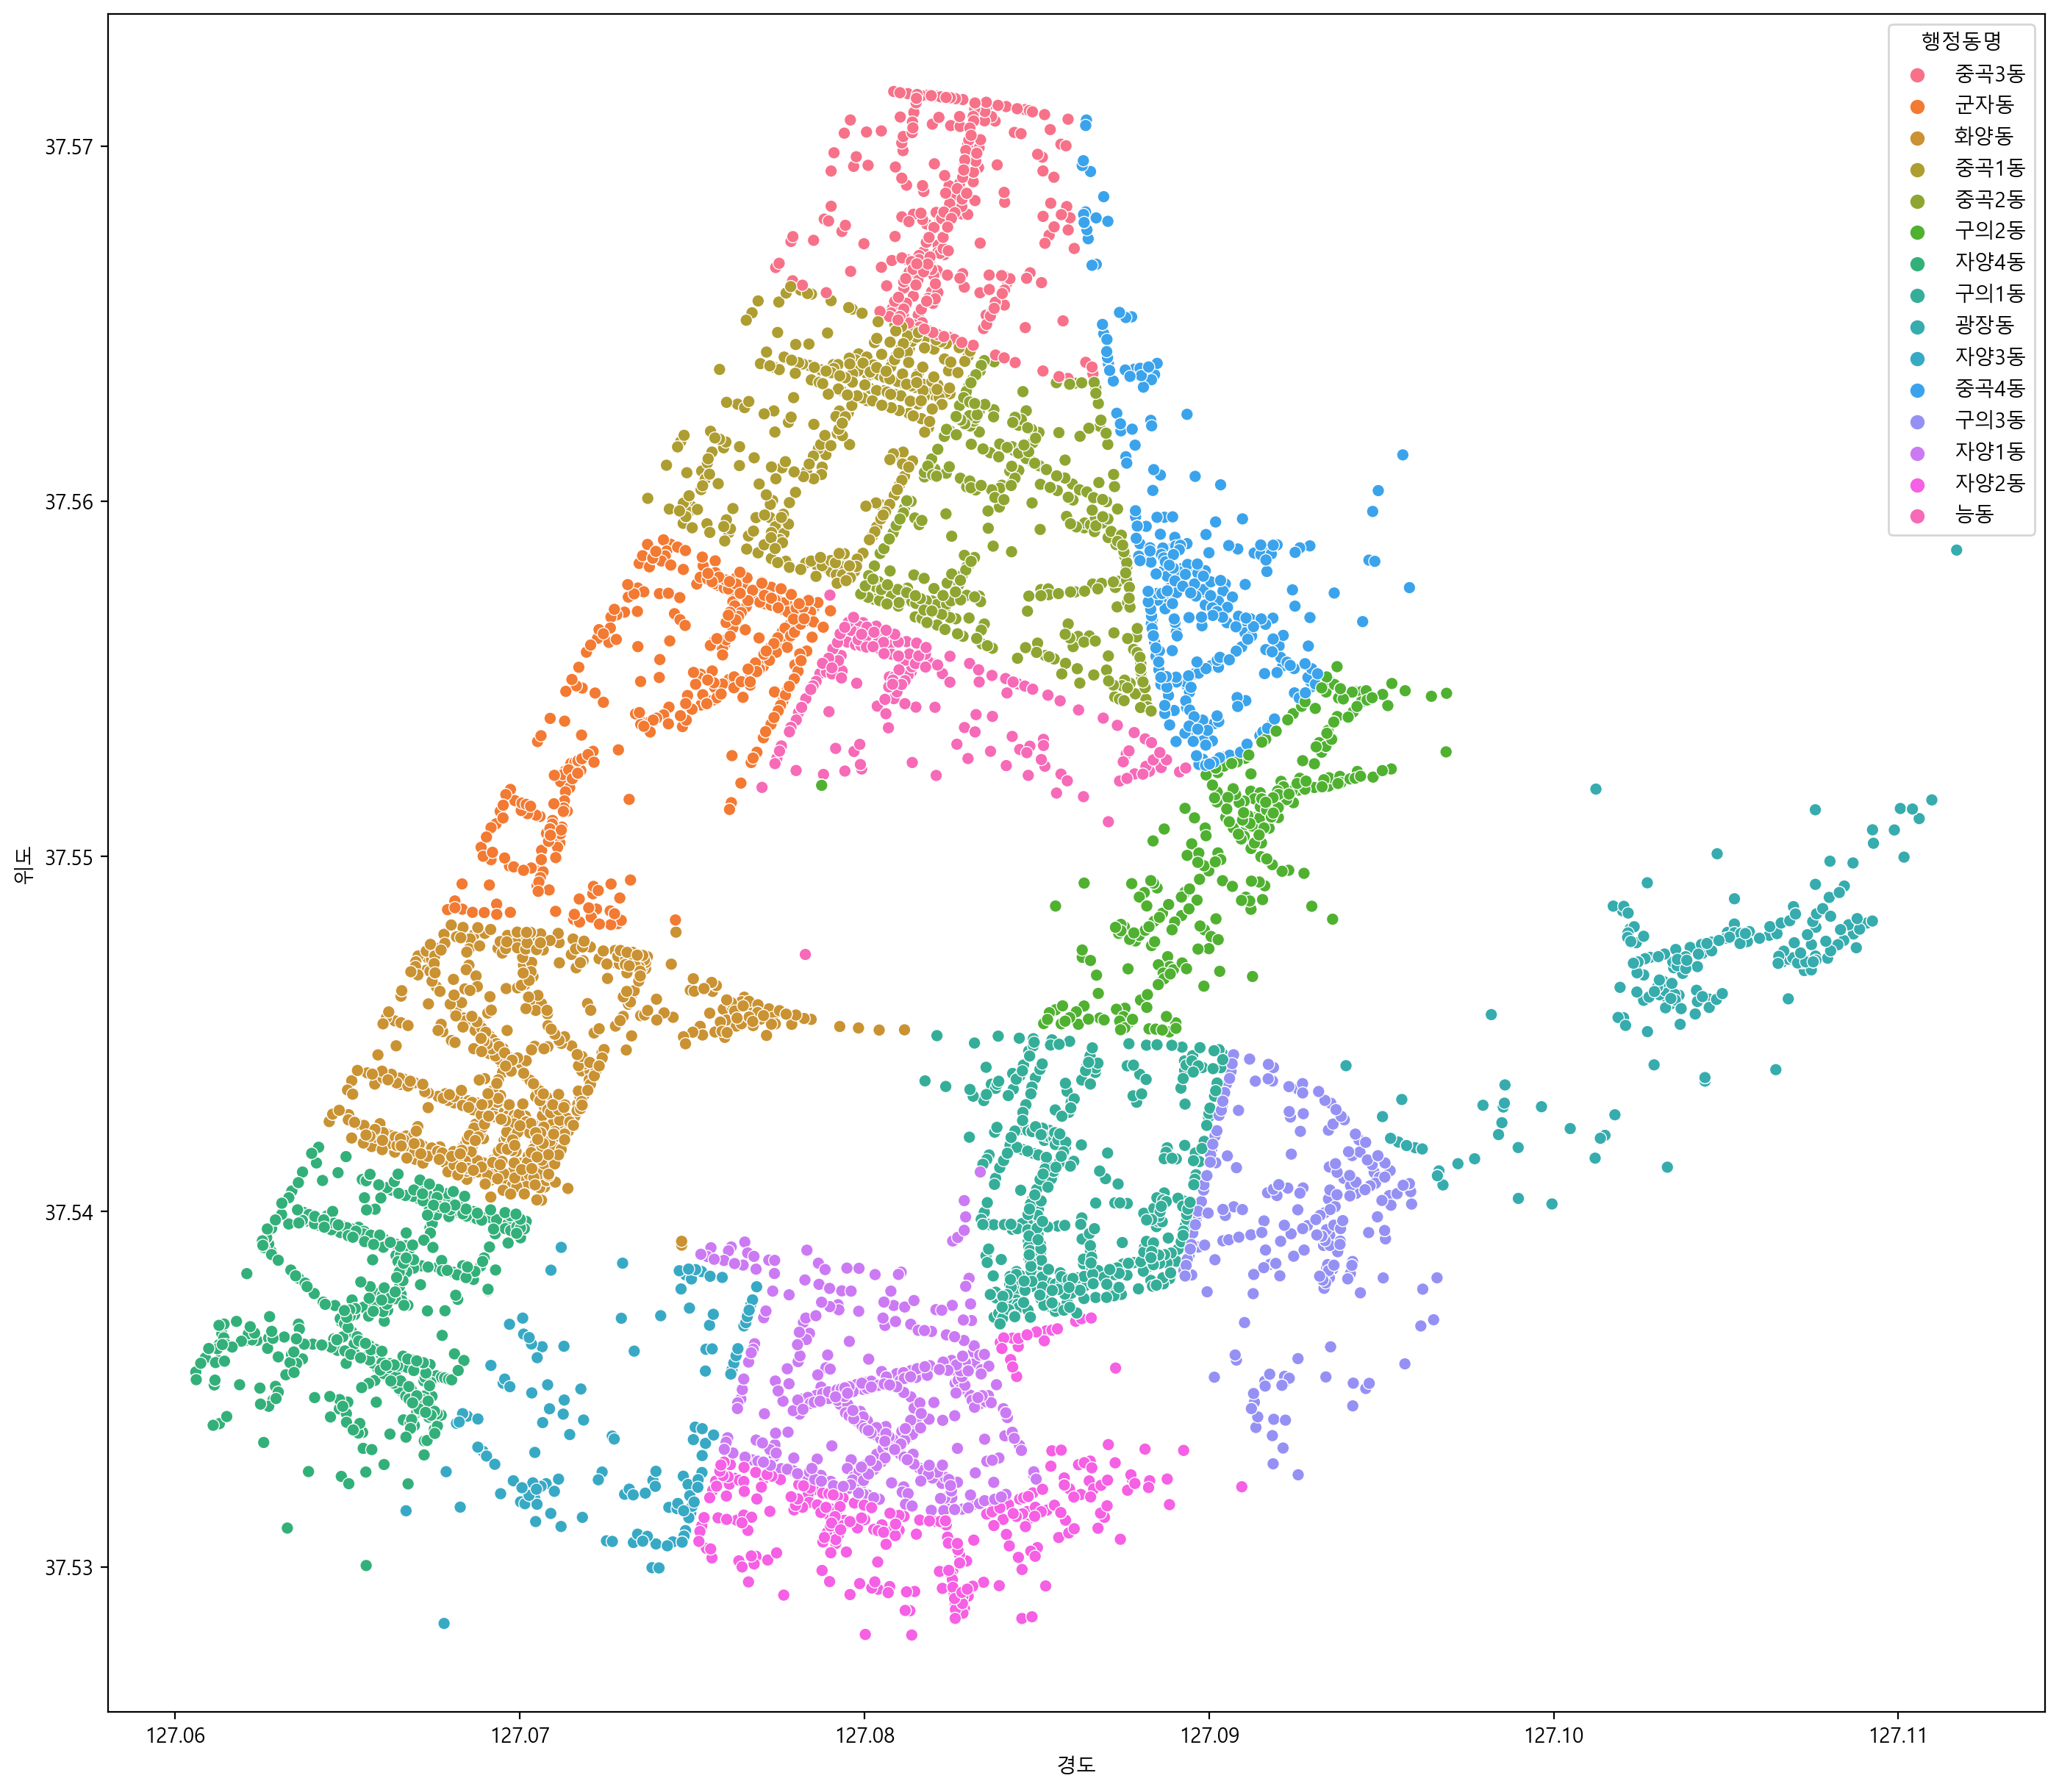

In [17]:
plt.figure(figsize = (17,15))
sns.scatterplot(data=real_df, x="경도", y="위도", hue="행정동명")